# Visualisation par réduction de dimension des features - t-SNE

## Importation des modules utiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from src.modelisation.utils import *

## Chargement et formatage des données

Nous commençons par charger les données.

In [2]:
df = pd.read_parquet("dataset2.parquet", engine="pyarrow")

Nous allons procéder à la visualisation seulement sur les données associées à un unique label. Cela correspond à environ 84% des données.

In [3]:
df_unique = keep_unique_label_data(df)

/home/jovyan/work/multi-label-classification/src/modelisation/utils.py:48: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_unique.drop(to_drop,0,inplace=True)


In [4]:
df_unique.shape

(42667, 26)

Puis nous créeons une liste *labels_unique*. Chaque élément i de *labels_unique* est une liste contenant le ou les genres associés au track n°i de la base de données *df_unique*.

In [5]:
labels_unique = create_labels(df_unique, 21)

Nous convertissons ensuite les genres sous formes d'entiers.

In [6]:
Y = convert_string_labels_into_numbers(df_unique, labels_unique)

Enfin, nous rassemblons les *audio features* puis les *usage features* de chaque *track* associé à un unique label et nous procédons à une réduction de dimension de chacun de ces vecteurs afin de les transformer en vecteurs à deux dimmensions pouvant être représentés dans un plan.

Remarque : Nous ne conservons que les 1000 premiers *tracks* pour ne pas surcharger les graphiques.

In [7]:
audio_features = [list(df_unique.values[i][22]) for i in range(1000)]
X_audio = np.array(audio_features)

In [8]:
usage_features = [list(df_unique.values[i][23]) for i in range(1000)]
X_usage = np.array(usage_features)

## Visualisation des *audio features*

Nous procédons à la réduction de dimension par la méthode t-SNE.

In [9]:
X_audio_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X_audio)

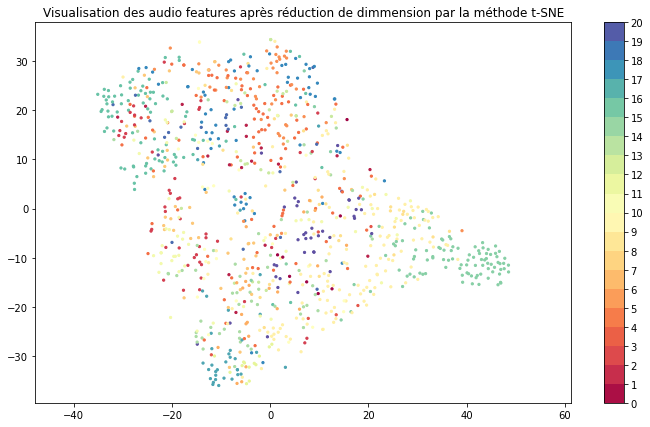

In [13]:
fig1 = plt.figure(figsize=(12,7))
plt.scatter(X_audio_embedded[:,0], X_audio_embedded[:,1], c=Y[:1000],cmap='Spectral',s=5)
plt.gca().set_aspect('equal','datalim')
plt.colorbar(boundaries=np.arange(0,21)).set_ticks(np.arange(0,21))
plt.title('Visualisation des audio features après réduction de dimmension par la méthode t-SNE')
plt.show()

## Visualisation des *usage features*

Nous procédons à la réduction de dimension par la méthode t-SNE.

In [11]:
X_usage_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X_usage)

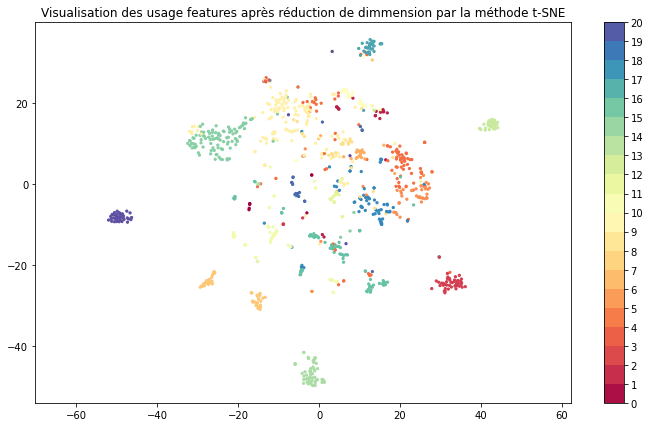

In [12]:
fig2 = plt.figure(figsize=(12,7))
plt.scatter(X_usage_embedded[:,0], X_usage_embedded[:,1], c=Y[:1000],cmap='Spectral',s=5)
plt.gca().set_aspect('equal','datalim')
plt.colorbar(boundaries=np.arange(0,21)).set_ticks(np.arange(0,21))
plt.title('Visualisation des usage features après réduction de dimmension par la méthode t-SNE')
plt.show()

**Analyse** : La visualisation des *usage features* montre la présence de *clusters* contrairement à la visualisation des *audio_features*.